<a href="https://colab.research.google.com/github/hectorcamachoz/Regresion_No_Lineal/blob/main/A1_6_594557.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 1.6. Regresion no lineal

El objetivo de esta tarea es generar un diferentes modelos no lineales, implementando regresion polinomial, segmentada, y no parametrico (KNN).

**1.** Primero con el uso de la libreria pandas, se importara el archivo csv, y se generara una grafica de dispersion con el uso de la libreria matplotlib.pyplot

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('Tiempo_de_Entrega.csv')

#num_min_T1 = df.loc[(df.Tiempo < 1) & (df.index.isin(range(428))), 'Calificacion']
#print(num_min_T1)
#num = pd.to_numeric(num_min_T1, errors='coerce')
#prom = num.mean()
#print(prom)


Abri el csv, en Visual studio, para observarlo sin que excel me cambiara el formato de los numeros. Al observarlo, vi que las ultimas 4 filas, no tenian un valor numerico, y ademas abajo de eso, habia como 10 filas en blanco, estas las elimine ya que no tenian ninguna variable.

Para los valores de tiempo que no tenian un valor numerico, realice lo siguiente, elimine su valor no numerico, y observe que el valor de tiempo para las 4 filas era menor a 1, por lo tanto realice un codigo (el que esta comentado) para caluclar el promedio de todos los valores de calificacion, cuyo tiempo es menor a 1, despues de esto, simplemente escribi el valor en las 4 filas y listo.

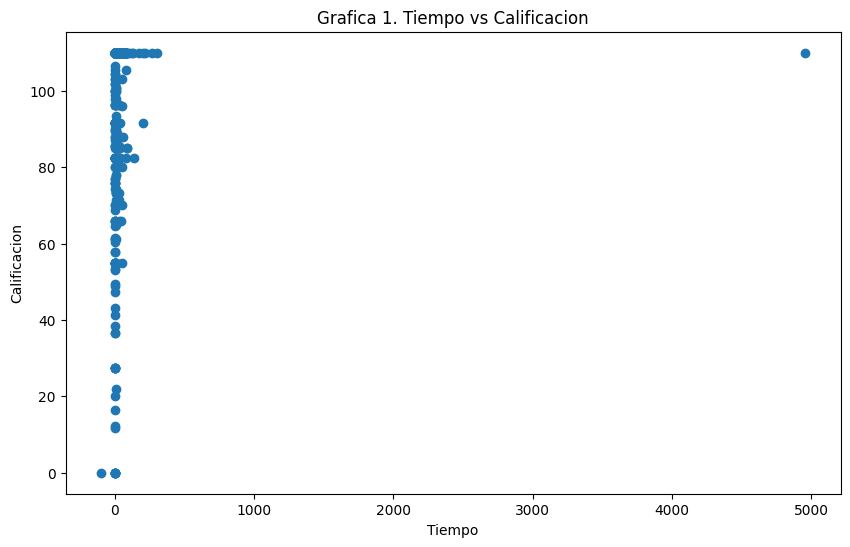

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Tiempo'], df['Calificacion'] )
plt.xlabel('Tiempo')
plt.ylabel('Calificacion')
plt.title('Grafica 1. Tiempo vs Calificacion')
plt.show()

In [4]:
valor = df.loc[df.Tiempo > 3000, 'Tiempo']

print(valor)

29    4960.167
Name: Tiempo, dtype: float64


Observando el valor de tiempo desplegado arriba con un valor de 4960.167, no me hace sentido, ya que se tuvo que haber entregado la tarea 207 dias antes del dia de entrega. Por lo tanto, considero que es un valor atipico, y lo remplazare por el tiempo promedio.

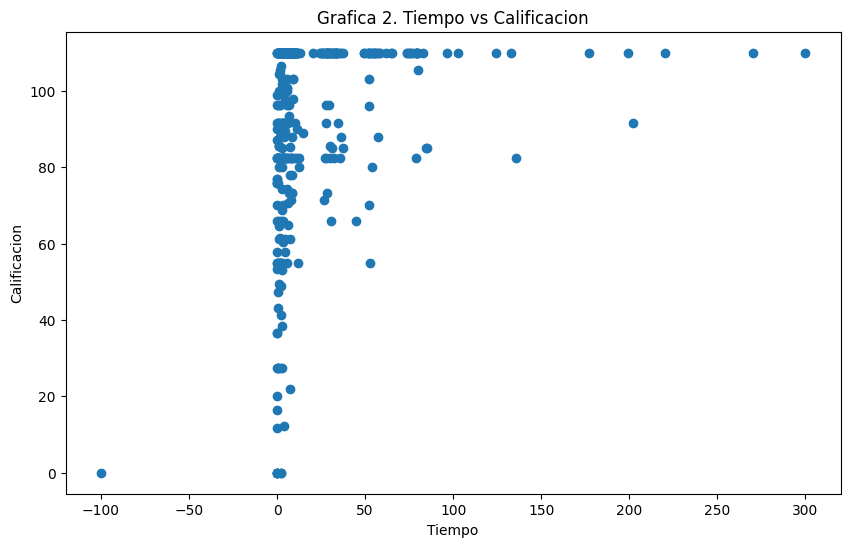

In [5]:
prom_tiempo = df['Tiempo'].mean()
df['Tiempo'] = df['Tiempo'].replace(4960.167, prom_tiempo)
plt.figure(figsize=(10, 6))
plt.scatter(df['Tiempo'], df['Calificacion'] )
plt.xlabel('Tiempo')
plt.ylabel('Calificacion')
plt.title('Grafica 2. Tiempo vs Calificacion')
plt.show()

Al observar la grafica, considero que el tipo de algoritmo mas adecuado para estos datos sera una regresion segmentada con continuidad. Mi segunda opcion es una de segundo orden.

**2.** Ahora que ya se tiene la base de datos en orden. Se separaran los datos; 70% seran utilizados para el entrenamiento del modelo, y el 30% para las pruebas. Ademas, se imprimaran los datos promedio de tiempo de ambas particiones, al igual que el de calificaciones

In [6]:
from sklearn.model_selection import train_test_split
import numpy as np


train, test = train_test_split(df, train_size=0.7)

prom_tiempo_train = train['Tiempo'].mean()
prom_tiempo_test = test['Tiempo'].mean()
prom_calif_train = train['Calificacion'].mean()
prom_calif_test = test['Calificacion'].mean()

x_train = train['Tiempo']
y_train = train['Calificacion']


print("Tiempo promedio de entrenamiento: ", prom_tiempo_train)
print("Calificacion promedio de entrenamiento: ", prom_calif_train)
print('')
print("Tiempo promedio de prueba: ", prom_tiempo_test)
print("Calificacion promedio de prueba: ", prom_calif_test)

Tiempo promedio de entrenamiento:  18.021493773434543
Calificacion promedio de entrenamiento:  95.37385498940397

Tiempo promedio de prueba:  16.111132478500004
Calificacion promedio de prueba:  92.82746561538463


Se puede observar que en los valores de promedio del tiempo hay una diferencia aproximada de 0.6 horas, y para los valores de calificacion hay una diferencia aproximada de 3. A pesar de que las diferencias son minimas, ambas, podrian afectar nuestro analisis, sin embargo, la diferencia que mas podria afectar es la de calificacion, haciendo que la prediccion no sea tan precisa, y que tenga un mayor error, ya que la particion no podria ser completamente representativa.

**3.** A continuacion, se entrenara un modelo polinomial de grado 2.

In [7]:
x_test = test['Tiempo']
y_test = test['Calificacion']
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

x_train_reshaped = x_train.values.reshape(-1, 1)
x_test_reshaped = x_test.values.reshape(-1, 1)

polyq_train = PolynomialFeatures(degree=2).fit(x_train_reshaped)
plyq_test = PolynomialFeatures(degree=2).fit(x_test_reshaped)

xq_train = pd.DataFrame(polyq_train.transform(x_train_reshaped))
xq_test = pd.DataFrame(plyq_test.transform(x_test_reshaped))

md = sm.OLS(list(y_train), xq_train).fit()

print(md.summary())

yhat_md = md.predict(xq_test)
RSS_md = sum((list(y_test)-yhat_md)**2)
RSE_md = np.sqrt(RSS_md/(len(y_test)-1))
print('RSE modelo cuadratico: ',RSE_md)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     12.51
Date:                Wed, 19 Feb 2025   Prob (F-statistic):           6.07e-06
Time:                        17:01:33   Log-Likelihood:                -1342.9
No. Observations:                 302   AIC:                             2692.
Df Residuals:                     299   BIC:                             2703.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0             91.6121      1.412     64.859      0.0

Al observar los resultados de la R2 ajustada del modelo, podemos decir que no es un modelo apto para estos datos.

La variable tiempo tiene una relacion significativa con la variable de calificacion. La relacion lineal que se tiene en los datos es positiva, a mayor tiempo pasa, la calificacion aumenta un 0.3231. Sin embargo, el coeficiente cuadratico negativo nos dice que a largo plazo disminuye.

**4.** Ahora, se entrenara un modelo de regresion segmentada utilizando regresiones cuadraticas para cada segmento, y se haran predicciones utilizando los datos de validacion

In [8]:
from mlinsights.mlmodel import PiecewiseRegressor
from sklearn.preprocessing import KBinsDiscretizer

ms = PiecewiseRegressor('bins').fit(xq_train.iloc[:,1:],y_train)

yhat_ms = ms.predict(xq_test.iloc[:,1:])
RSS_ms = sum((list(y_test)-yhat_ms)**2)
RSE_ms = np.sqrt(RSS_ms/(len(y_test)-1))
print('RSE modelo segmentado: ',RSE_ms)

ModuleNotFoundError: No module named 'mlinsights'

**5.** Ahora, se entranara un modelo KNN para regresion, utilizando un valor de k = 29

In [ ]:
from sklearn.neighbors import KNeighborsRegressor as KNN

mk = KNN(n_neighbors=29).fit(x_train_reshaped,y_train)
yhat_mk = mk.predict(x_test_reshaped)
RSS_mk = sum((list(y_test)-yhat_mk)**2)
RSE_mk = np.sqrt(RSS_mk/(len(y_test)-1))
print('RSE modelo KNN: ',RSE_mk)

**6.** Al observar los RSE, previamente calculados de cada modelo, el menor RSE es el del modelo segmentado, despues el del modelo KNN y por ultimo el modelo cuadratico. Considero que el mejor modelo si es el segmentado, no solo por su menor valor en RSE sino tambien su facilidad de interpretacion en la grafica. Los datos en la grafica de dispersion 'Tiempo vs Dispersion', parecen formar dos lineas rectas, una hacia arriba y una hacia el lado derecho, y en medio de estas hay una curva. Por lo tanto, como mencione al principio del reporte, el modelo que mejor iba a interpretar los datos era un modelo segmentado.

**7.** Por ultimo, se graficaran las calificaciones reales, como las predichas, en una misma figura.

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_ms, label='Modelo Segmentado', alpha = 0.7)
plt.scatter(y_test, yhat_mk, label='Modelo KNN', alpha = 0.7)
plt.scatter(y_test, yhat_md, label='Modelo Cuadratico', alpha = 0.7)
plt.xlabel('Calificacion Real')
plt.ylabel('Calificacion Predicha')
plt.title('Grafica 3. Comparación de Modelos')
plt.grid(True, linestyle = '--',alpha = 0.5)
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_test, label='Calificacion Real', alpha = 0.7)
plt.scatter(x_test, yhat_md, label='Modelo Cuadratico', alpha = 0.7)
plt.scatter(x_test, yhat_ms, label='Modelo Segmentado', alpha = 0.7)
plt.scatter(x_test, yhat_mk, label='Modelo KNN', alpha = 0.7)
plt.xlabel('Tiempo')
plt.ylabel('Calificacion')
plt.title('Grafica 4. Tiempo vs Calificacion (predicha por los distintos modelos)')
plt.grid(True, linestyle = '--',alpha = 0.5)
plt.legend()
plt.show()